In [1]:
from ai4ha.data.series.SleepDataset import SleepDataset
from ai4ha.data.series.ECGDataset import ECGDataset
import matplotlib.pyplot as plt
import numpy as np
from sys import getsizeof

In [22]:
3008/(2**4)

188.0

In [2]:
orig = SleepDataset(dir="/home/bejar/ssdstorage/Sleep/",
                  dataset='train',
                  padding=72,
                  padalgo='repeat')

Loading data from /home/bejar/ssdstorage/Sleep/


/home/bejar/PycharmProjects/misiones/ai4ha/data/series/SleepDataset.py:27: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  dataset.append(np.swapaxes(data['x'], 1, 2))
/home/bejar/PycharmProjects/misiones/ai4ha/data/series/SleepDataset.py:28: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  labels.append(data['y'])


train
X_train shape is (137521, 1, 3072)
y_train shape is (137521,)
NClasses: 5 [0 1 2 3 4]
PAD=72 PADALGO=repeat NORM=None


In [64]:
orig = ECGDataset(dir="/home/bejar/ssdstorage/PTBXL",
                  dataset='train',
                  padding=120,
                  padalgo='mirror-s', sampling_smoothing_value=0,
                  sampling_smoothing='inverse')

Loading data from /home/bejar/ssdstorage/PTBXL
train
X_train shape is (16433, 12, 1120)
y_train shape is (16433,)
NClasses: 7 [0 1 2 3 4 5 6]
PAD=120 PADALGO=mirror-s NORM=False CHANNEL=12/None
Sampling smoothing Weights for classes: [ 32.2848723    1.22597732  13.58099174  25.55676516 483.32352941
  26.80750408 821.65      ]


In [3]:
getsizeof(orig.X_train)/1024/1024/1024

1.5738030821084976

In [4]:
orig[0][0].shape

(1, 3072)

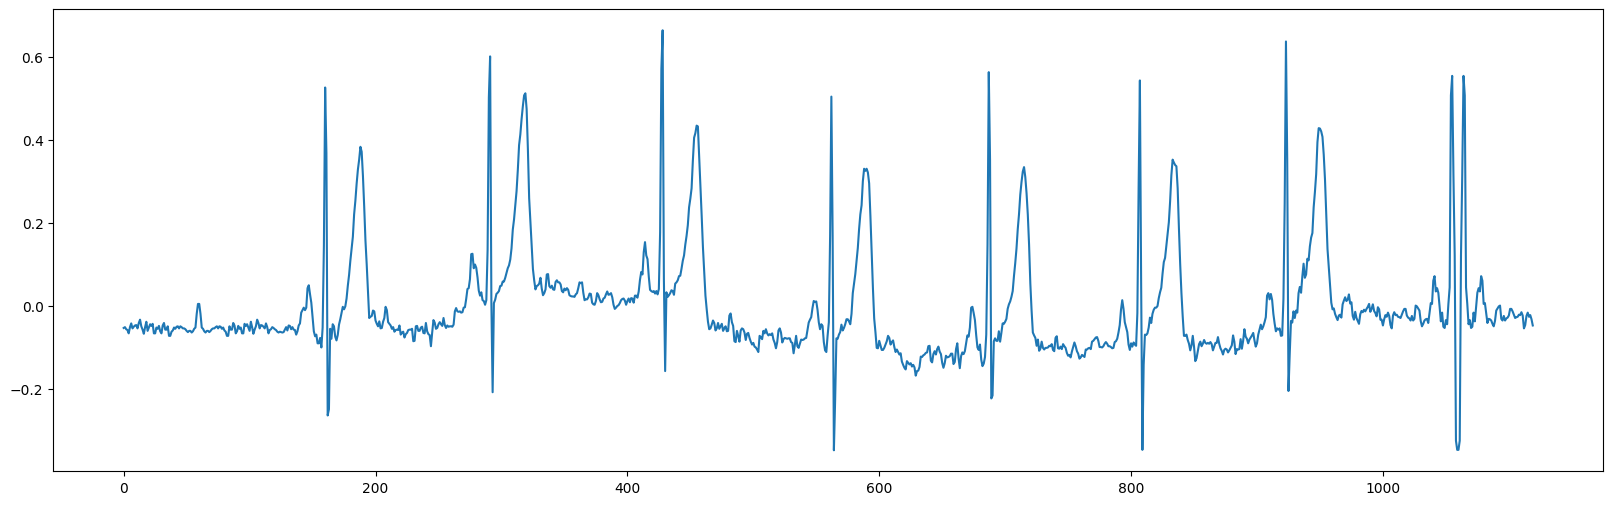

In [65]:
plt.figure(figsize=(20, 6))
plt.plot(orig.X_train[1][0]);

---

In [4]:
from ai4ha.util.train import get_diffuser_scheduler
import torch

In [106]:
config = {"diffuser":{
        "type":"DDPM",
        "prediction_type": "sample",
        "num_steps": 1000,
        "num_inference_steps": 1000,
        "beta_schedule":"linear",
        "betas": [1e-6, 2e-4],
        "variance_type":"fixed_small",
        "clip_sample": False
    }}

In [107]:
noise_scheduler = get_diffuser_scheduler(config)
data =  torch.tensor(orig[0:5][0]).float()
noise = torch.randn(data.shape)
noisy_images = noise_scheduler.add_noise(data, noise,
                                                     torch.tensor([999, 999, 999, 999, 999]))

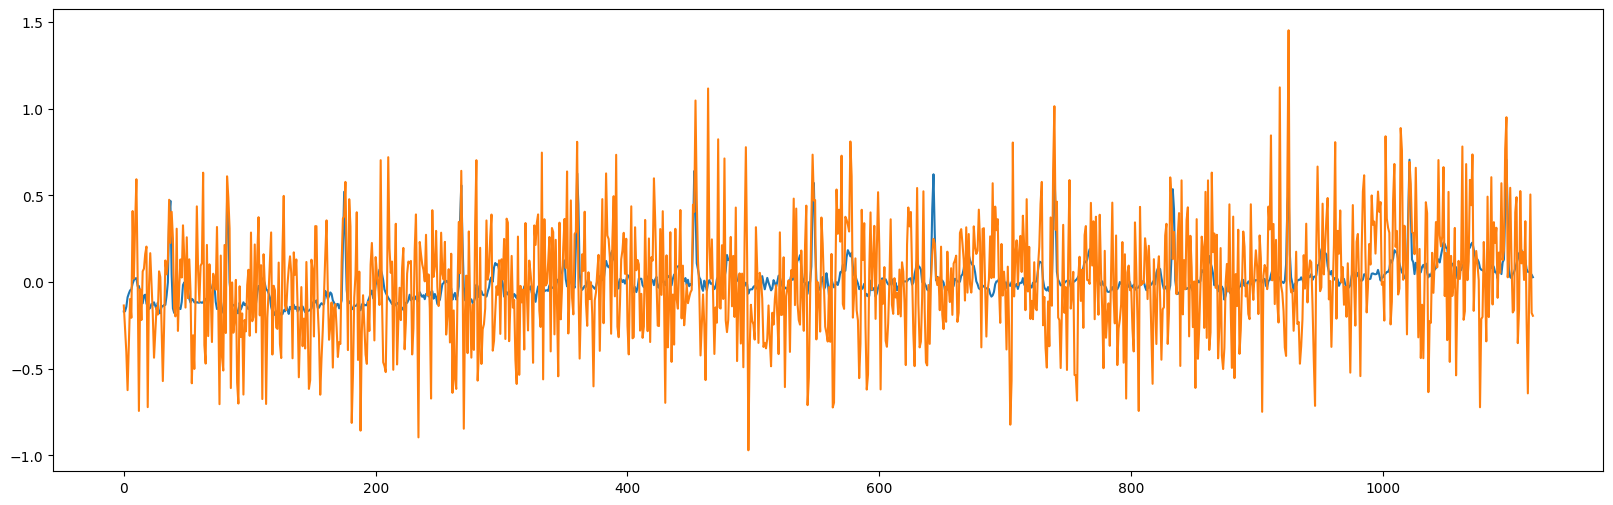

In [108]:
plt.figure(figsize=(20, 6))
plt.plot(data[0][0]);
plt.plot(noisy_images[0][0]);

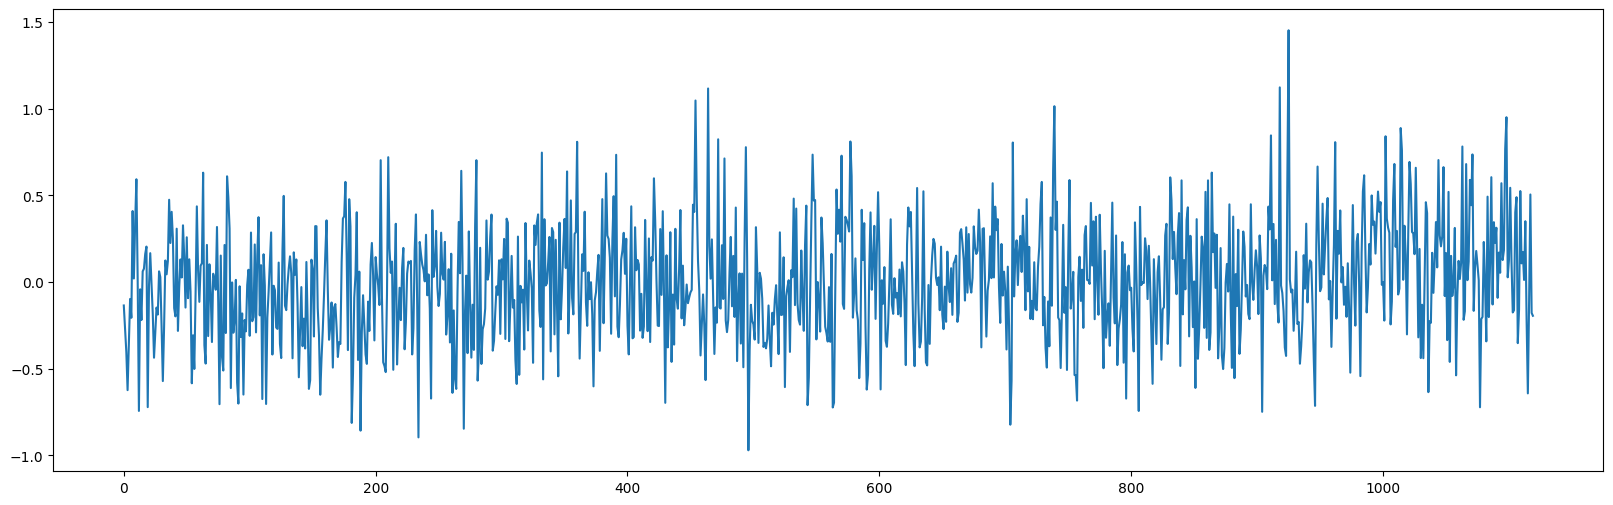

In [109]:
plt.figure(figsize=(20, 6))
plt.plot(noisy_images[0][0]);

In [2]:
model = 'EEG_Sleep-all-mirror-s328-b512-M-UNET1C-s3328-l32-1244488-r6-a1-te-positional-ce-embedding-6-DF-DDPM-t500-b-4-22-ZSNR-linear-pt-sample-OPT-adamw-lr0.0001-SCcosine-w100-LS-L2'
samples = np.load(
    f'/home/bejar/bsc/misiones/Series/Models/TimeDiffusion/logs/{model}/samples/sampled_data_Sleep.npz'
)

In [3]:
samples['x'].shape

(161792, 3000)

In [4]:
samples['y'].shape

(161792,)

In [5]:
samples['model']

array('EEG_Sleep-all-mirror-s328-b512-M-UNET1C-s3328-l32-1244488-r6-a1-te-positional-ce-embedding-6-DF-DDPM-t500-b-4-22-ZSNR-linear-pt-sample-OPT-adamw-lr0.0001-SCcosine-w100-LS-L2',
      dtype='<U173')

In [2]:
samples = np.load(
    f'/home/bejar/bsc/Data/EEG/sampled_data_Sleep.npz'
)

In [4]:
samples['sname']

array(79)